In [15]:
import seaborn as sns
import json
import pandas as pd

In [122]:
datasets = ["oxfordpets"]

In [123]:
# Import results per dataset

def df_per_dataset(dataset_name):
    print(dataset_name)
    f = open(f'/nethome/bdevnani3/vis_lang/efficient_finetuning/raw_embedding_generation/results/{dataset_name}/plots.json',)
    results = json.load(f)

    out = []

    for experiment in results:
        if experiment != "weighted_image_and_text_embedding":
            for num_classes in results[experiment]:
                for it in results[experiment][num_classes]:
                    out.append([experiment, int(num_classes), float(it)])
                    
    df = pd.DataFrame(out, columns=["experiment", "instances_per_class", "accuracy"])
    df['dataset'] = dataset_name
    return df

all_data = []
for dataset in datasets:
    all_data.append(df_per_dataset(dataset))
    
all_data = pd.concat(all_data)


oxfordpets


In [124]:
def df_per_dataset_weighted(dataset_name):
    f = open(f'/nethome/bdevnani3/vis_lang/efficient_finetuning/raw_embedding_generation/results/{dataset_name}/plots.json',)
    results = json.load(f)

    out = []
    for num_classes in results["weighted_image_and_text_embedding"]:
        for i,d in enumerate(results["weighted_image_and_text_embedding"][num_classes]):
            for lam in d:
                out.append([int(num_classes), lam, d[lam]])

    df2 = pd.DataFrame(out, columns=["instances_per_class","lam", "accuracy"])
    df2['dataset'] = dataset_name
    df2['experiment'] = "weighted_image_and_text_embedding"
    df2["lam"] = pd.to_numeric(df2["lam"])
    df2["lam"] = df2["lam"].round(decimals = 2)
    
    return df2
all_weighted_data = []
for dataset in datasets:
    all_weighted_data.append(df_per_dataset_weighted(dataset))
    
all_weighted_data = pd.concat(all_weighted_data)

all_weighted_data.lam.unique()

# instances_per_class = -1
# df_e = df2[df2.instances_per_class == instances_per_class]
# ax = sns.lineplot(data=df_e, x="lam", y="accuracy", marker="o")
# ax.set_title(f"weighted_image_and_text_embedding - instances_per_class: {instances_per_class}")

array([0.  , 0.05, 0.11, 0.16, 0.21, 0.26, 0.32, 0.37, 0.42, 0.47, 0.53,
       0.58, 0.63, 0.68, 0.74, 0.79, 0.84, 0.89, 0.95, 1.  ])

In [125]:
all_weighted_data

,instances_per_class,lam,accuracy,dataset,experiment
0,1,0.00,0.838376,oxfordpets,weighted_image_and_text_embedding
1,1,0.05,0.839193,oxfordpets,weighted_image_and_text_embedding
2,1,0.11,0.840283,oxfordpets,weighted_image_and_text_embedding
3,1,0.16,0.841374,oxfordpets,weighted_image_and_text_embedding
4,1,0.21,0.841646,oxfordpets,weighted_image_and_text_embedding
...,...,...,...,...,...
615,-1,0.79,0.889343,oxfordpets,weighted_image_and_text_embedding
616,-1,0.84,0.885800,oxfordpets,weighted_image_and_text_embedding
617,-1,0.89,0.882802,oxfordpets,weighted_image_and_text_embedding
618,-1,0.95,0.877623,oxfordpets,weighted_image_and_text_embedding


In [126]:
all_data[all_data.experiment == "clip_linear_probe"]

,experiment,instances_per_class,accuracy,dataset
129,clip_linear_probe,1,0.357318,oxfordpets
130,clip_linear_probe,1,0.318888,oxfordpets
131,clip_linear_probe,1,0.387026,oxfordpets
132,clip_linear_probe,1,0.380213,oxfordpets
133,clip_linear_probe,1,0.336331,oxfordpets
134,clip_linear_probe,2,0.472881,oxfordpets
135,clip_linear_probe,2,0.492777,oxfordpets
136,clip_linear_probe,2,0.473971,oxfordpets
137,clip_linear_probe,2,0.478877,oxfordpets
138,clip_linear_probe,2,0.481603,oxfordpets


In [127]:
random_image_embedding = all_data[all_data.experiment == "random_image_embedding"]
random_image_embedding_from_class = all_data[all_data.experiment == "random_image_embedding_from_class"]
nearest_image_embedding = all_data[all_data.experiment == "nearest_image_embedding"]
average_image_embedding = all_data[all_data.experiment == "average_image_embedding"]
average_image_and_text_embedding = all_data[all_data.experiment == "weighted_image_and_text_embedding_0_5"]
linear_probe = all_data[all_data.experiment == "clip_linear_probe"]
weighted_image_and_text_embedding =all_data[all_data.experiment == "weighted_image_and_text_embedding"] 

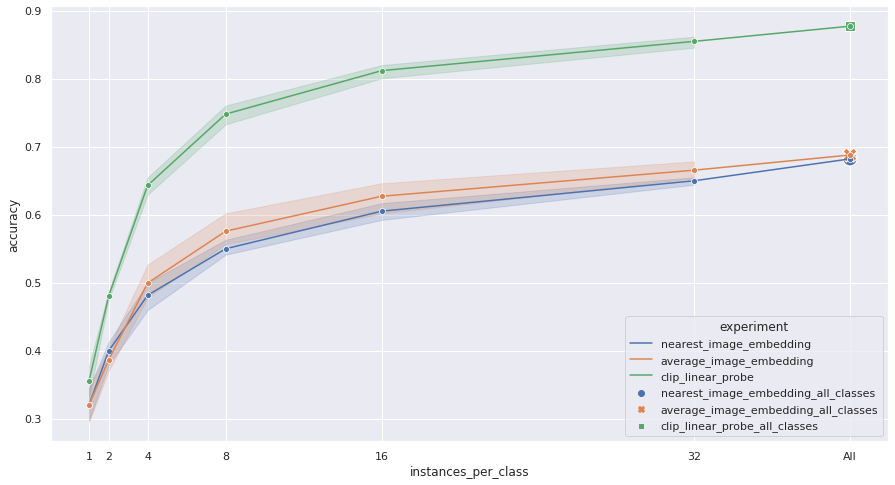

In [128]:
# Vision Graph
import matplotlib.pyplot as plt


# Linear probe

datasets = [
    "cifar100", 
    "flowers102", 
    "food101", 
    "oxfordpets"
]

import numpy as np

vision = pd.concat([nearest_image_embedding, average_image_embedding, linear_probe])
sns.set(rc = {'figure.figsize':(15,8)})

# Pretty stars
expts = ["nearest_image_embedding", "average_image_embedding", "clip_linear_probe"]
apnd = []

for exp in expts:
    for dataset in datasets:
        tmp = vision.loc[(vision['experiment']==exp) & (vision['instances_per_class']==-1) & (vision['dataset']==dataset)]
        y = np.mean(tmp["accuracy"])
        apnd.append([exp + "_all_classes", 40, y, "_"+dataset])
        
apnd = pd.DataFrame(apnd, columns=["_experiment", "instances_per_class", "accuracy", "_dataset"])
        
# vision = vision[vision.instances_per_class != -1]

# dataset = "cifar100"
# dataset = "flowers102" 
# dataset = "food101"
dataset = "oxfordpets"

vision = vision.replace(-1, 40)
apnd = apnd[apnd._dataset== "_"+dataset]
vision = vision[vision.dataset==dataset]
ax2 = sns.scatterplot(data=apnd, x="instances_per_class", y="accuracy", marker="*", hue="_experiment", style="_experiment", s=200)
ax = sns.lineplot(data=vision, x="instances_per_class", y="accuracy", marker="o", hue="experiment",)

ax.set_xticks([1,2,4,8,16,32,40])
ax.set_xticklabels([1,2,4,8,16,32,"All"])

plt.show()

In [129]:
vision.groupby(["experiment", "instances_per_class"])["accuracy"].mean()

experiment               instances_per_class
average_image_embedding  1                      0.320469
                         2                      0.386263
                         4                      0.499428
                         8                      0.575634
                         16                     0.627037
                         32                     0.665304
                         40                     0.687653
clip_linear_probe        1                      0.355955
                         2                      0.480022
                         4                      0.643009
                         8                      0.747833
                         16                     0.811720
                         32                     0.854729
                         40                     0.877078
nearest_image_embedding  1                      0.320305
                         2                      0.399509
                         4                 

<AxesSubplot:xlabel='instances_per_class', ylabel='accuracy'>

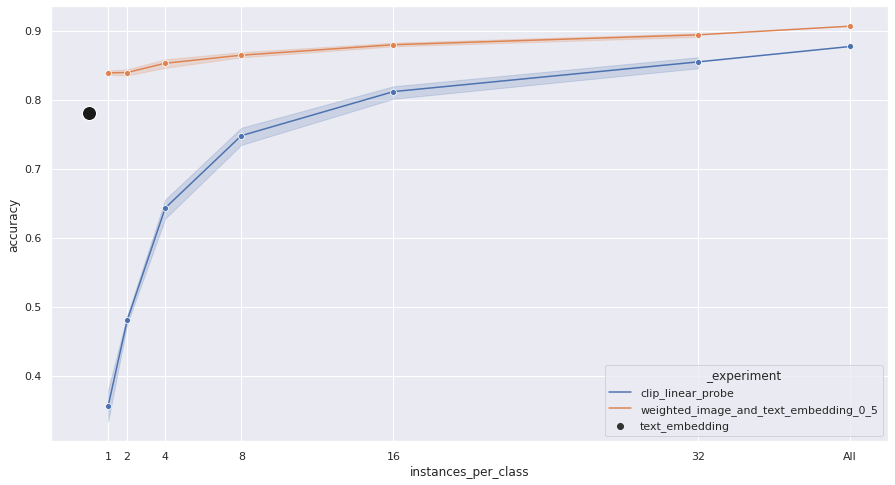

In [130]:
import numpy as np

# Plot 2

# vision = pd.concat([average_image_embedding, average_image_and_text_embedding])
vision = pd.concat([linear_probe, average_image_and_text_embedding])
sns.set(rc = {'figure.figsize':(15,8)})

# Pretty stars
expts = ["average_image_embedding", "weighted_image_and_text_embedding_0_5", "weighted_image_and_text_embedding"]
apnd = []

for exp in expts:
    for dataset in datasets:
        tmp = vision.loc[(vision['experiment']==exp) & (vision['instances_per_class']==-1) & (vision['dataset']==dataset)]
        y = np.mean(tmp["accuracy"])
        apnd.append([exp, -1, y, "_"+dataset])
        
apnd = pd.DataFrame(apnd, columns=["_experiment", "instances_per_class", "accuracy", "_dataset"])

# dataset = "cifar100"
# dataset = "flowers102" 
# dataset = "food101"
dataset = "oxfordpets"

        
# vision = vision[vision.instances_per_class != -1]
vision = vision.replace(-1, 40)
vision = vision[vision.dataset==dataset]
# ax2 = sns.scatterplot(data=apnd, x="instances_per_class", y="accuracy", marker="*", hue="_dataset", style="_experiment", s=200)
ax = sns.lineplot(data=vision, x="instances_per_class", y="accuracy", marker="o", hue="experiment")
ax.set_xticks([1,2,4,8,16,32,40])
ax.set_xticklabels([1,2,4,8,16, 32,"All"])

clip_results = [["text_embedding", 0, .6137, "_"+"cifar100"],
                ["text_embedding", 0, .6251, "_"+"flowers102"],
                ["text_embedding", 0, .8997, "_"+"food101"],
                ["text_embedding", 0, .7813, "_"+"oxfordpets"]]

clip_results = pd.DataFrame(clip_results, columns=["_experiment", "instances_per_class", "accuracy", "_dataset"])
clip_results = clip_results[clip_results._dataset=="_"+dataset]
sns.scatterplot(data=clip_results, x="instances_per_class", y="accuracy", color="k", style="_experiment", s=200)

# lambda_plots = []

# for dataset in datasets:
#     tmp = vision.loc[(vision['experiment']==exp) & (vision['instances_per_class']==-1) & (vision['dataset']==dataset)]
#     y = np.mean(tmp["accuracy"])
#     apnd.append([exp, 40, y, "_"+dataset])


In [131]:
vision.groupby(["experiment", "instances_per_class"])["accuracy"].mean()

experiment                             instances_per_class
clip_linear_probe                      1                      0.355955
                                       2                      0.480022
                                       4                      0.643009
                                       8                      0.747833
                                       16                     0.811720
                                       32                     0.854729
                                       40                     0.877078
weighted_image_and_text_embedding_0_5  1                      0.838812
                                       2                      0.839357
                                       4                      0.852821
                                       8                      0.864486
                                       16                     0.879640
                                       32                     0.893977
                  

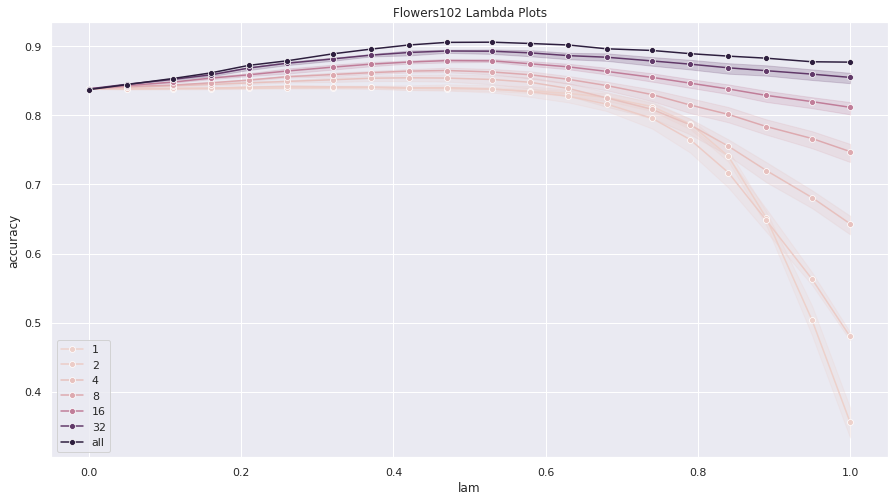

In [134]:
# Lambda plots

all_weighted_data_cifar = all_weighted_data[all_weighted_data.dataset == "oxfordpets"]


all_weighted_data_cifar = all_weighted_data_cifar.replace(-1, 40)
ax = sns.lineplot(data=all_weighted_data_cifar, 
                  x="lam", y="accuracy", marker="o", hue="instances_per_class", legend="full")
ax.set_title("Flowers102 Lambda Plots")
ax.legend(labels=[1,2,4,8,16, 32,"all"])


In [136]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_weighted_data_cifar.groupby(["instances_per_class", "lam"])["accuracy"].max())

instances_per_class  lam 
1                    0.00    0.838376
                     0.05    0.839193
                     0.11    0.840283
                     0.16    0.841374
                     0.21    0.841646
                     0.26    0.842736
                     0.32    0.843554
                     0.37    0.844372
                     0.42    0.843009
                     0.47    0.843282
                     0.53    0.843282
                     0.58    0.842464
                     0.63    0.839193
                     0.68    0.836740
                     0.74    0.826383
                     0.79    0.802671
                     0.84    0.754974
                     0.89    0.667212
                     0.95    0.537749
                     1.00    0.387026
2                    0.00    0.838376
                     0.05    0.839738
                     0.11    0.840829
                     0.16    0.841646
                     0.21    0.843554
                     0.2

Text(0.5, 1.0, 'Flowers102 Lambda Plots')

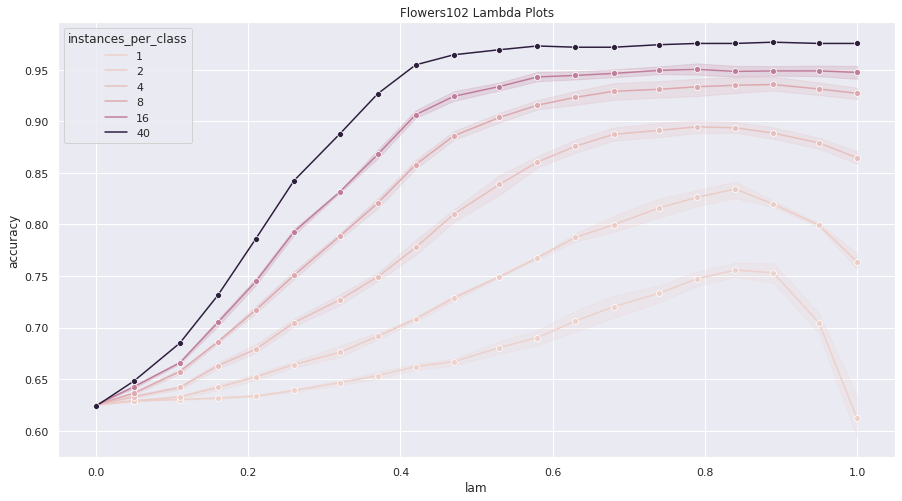

In [73]:
# Lambda plots

all_weighted_data_cifar = all_weighted_data[all_weighted_data.dataset == "flowers102"]


all_weighted_data_cifar = all_weighted_data_cifar.replace(-1, 40)


ax = sns.lineplot(data=all_weighted_data_cifar, 
                  x="lam", y="accuracy", marker="o", hue="instances_per_class", legend="full")
ax.set_title("Flowers102 Lambda Plots")
ax.legend(labels=[1,2,4,8,16,32,"all"])

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_weighted_data_cifar.groupby(["instances_per_class", "lam"])["accuracy"].mean())

Text(0.5, 1.0, 'OxfordPets Lambda Plots')

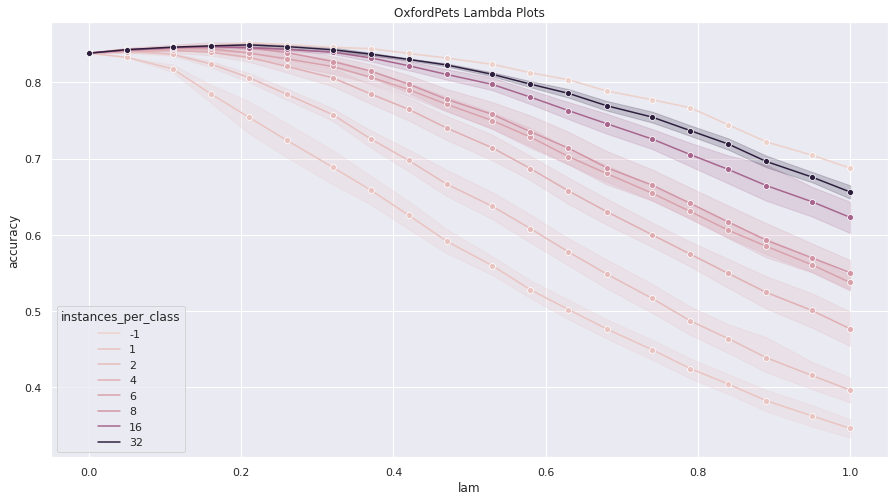

In [56]:
# Lambda plots

all_weighted_data_cifar = all_weighted_data[all_weighted_data.dataset == "oxfordpets"]

ax = sns.lineplot(data=all_weighted_data_cifar, 
                  x="lam", y="accuracy", marker="o", hue="instances_per_class", legend="full")
ax.set_title("OxfordPets Lambda Plots")

Text(0.5, 1.0, 'Food101 Lambda Plots')

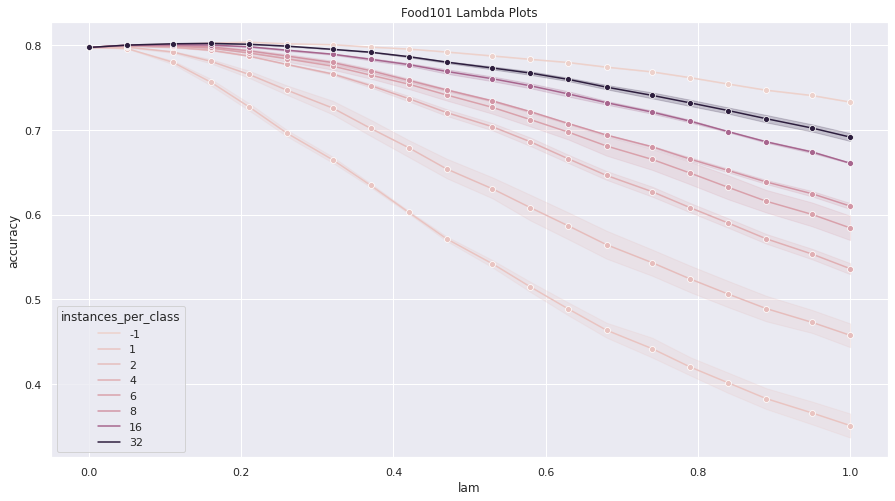

In [57]:
# Lambda plots

all_weighted_data_cifar = all_weighted_data[all_weighted_data.dataset == "food101"]

ax = sns.lineplot(data=all_weighted_data_cifar, 
                  x="lam", y="accuracy", marker="o", hue="instances_per_class", legend="full")
ax.set_title("Food101 Lambda Plots")